#### Client: No-Churn Telecom | Category: Telecom – Churn Rate ML
####               Project Ref: PM-PR-0017

No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.

1. Understanding the variables that are influencing the customersto migrate.
2. Creating Churn risk scores that can be indicative to driveretention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with valuesYES(1) or NO(0) so that email campaigns with lucrative offers can    be targeted to Churn YES customers
4. Exporting the trained model with prediction capability for CHURN-FLAG, which can be highlighted in service applications to      serve the customer better.

This is the second part of the modelling first part deals with the downloading of the data from the server and this part deals with the modlling of the data set

# 1.Importing Packages 

In [1]:
import numpy as np
import pandas as pd
import pylab
from scipy import stats
from category_encoders import BinaryEncoder
from sklearn.feature_selection import VarianceThreshold
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import colormaps
import warnings
import math
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pickle as pkl

In [2]:
warnings.filterwarnings("ignore")

# 2.Import Data_Set

In [3]:
main_data = pd.read_csv("churn_data.csv")
data = main_data.copy()
data.head()

,Unnamed: 0,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# 3. EDA checks 

In [4]:
data.shape

(4617, 22)

In [5]:
data.isnull().sum()

Unnamed: 0              0
State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

Hence there is no NAN values present hence we doesn't need to handle the NAN values

## Encoding

In [6]:
object_variables = data.select_dtypes(exclude="number").columns

In [7]:
object_variables

Index(['State', 'Phone', 'International_Plan', 'VMail_Plan', 'Churn'], dtype='object')

these features are to be encoded, because these are the object based categorical values

***-> Considering International_Plan for encoding***

In [8]:
data.International_Plan.value_counts()

 no     4171
 yes     446
Name: International_Plan, dtype: int64

International_Plan is a nominal categorical with object type values , hence we are using One Hot Encoding technique

In [9]:
data["International_Plan"] = pd.get_dummies(data.International_Plan,drop_first=True)

***-> Considering VMail_Plan for encoding***

In [10]:
data.VMail_Plan.value_counts()

 no     3381
 yes    1236
Name: VMail_Plan, dtype: int64

VMail_Plan is a nominal categorical with object type values , hence we are using One Hot Encoding technique

In [11]:
data["VMail_Plan"] = pd.get_dummies(data.VMail_Plan,drop_first=True)

***-> Considering Churn for encoding***

In [12]:
data.Churn.value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

Churn is a nominal categorical with object type values , hence we are using One Hot Encoding technique

In [13]:
data["Churn"] = pd.get_dummies(data.Churn,drop_first=True)

***-> Considering State for encoding***

In [14]:
print(data.State.unique())
print("\ntotal no of categories  = ",len(data.State.unique()))

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

total no of categories  =  51


State is a nominal categorical with object type values , hence the category count is large we cannot use One HOt Encoding technique so here we are considering mean encoding

####  MEAN_ENCODING TECHNIQUE

In [15]:
mean_enc_State = data.groupby(["State"])["Churn"].mean()
mean_enc_State.unique()

array([0.07246377, 0.0877193 , 0.19480519, 0.08641975, 0.29545455,
       0.10989011, 0.15217391, 0.1097561 , 0.15730337, 0.14117647,
       0.12987013, 0.06329114, 0.09230769, 0.11818182, 0.08860759,
       0.14606742, 0.1875    , 0.14444444, 0.09589041, 0.1443299 ,
       0.2173913 , 0.18947368, 0.17346939, 0.16071429, 0.13095238,
       0.17582418, 0.20652174, 0.14457831, 0.0875    , 0.07594937,
       0.12087912, 0.23584906, 0.0952381 , 0.19101124, 0.16513761,
       0.13636364, 0.1588785 , 0.11764706, 0.07777778, 0.19277108,
       0.15789474, 0.22857143, 0.15384615, 0.05504587, 0.10526316,
       0.23595506, 0.08080808, 0.1409396 , 0.09433962])

In [16]:
print(" Category length of States Feature in data before encoding = ",len(data.State.unique()))
print(" Category length of States Feature in data after encoding = ",len(mean_enc_State.unique()))

 Category length of States Feature in data before encoding =  51
 Category length of States Feature in data after encoding =  49


Hence from above output it is clear that while doing mean encoding we are loosing data ie., we are loosing two categories as compared to main feaure so we cannot use mean encoding for this data_feature now we are considering Binary Encoder 

#### Binary_Encoder

In [17]:
enc = BinaryEncoder()
enc_out = enc.fit_transform(data.State)
enc_out.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0


In [18]:
#joining the data with the encoded output
data = data.join(enc_out)

In [19]:
#droping the old data feature(State)
data.drop(columns="State",inplace=True,axis=1)

In [20]:
data.head()

,Unnamed: 0,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,International_Charge,CustServ_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5,State_6
0,0,128,415,382-4657,0,1,25,265.1,110,45.07,...,2.70,1,0,0,0,0,0,0,0,1
1,1,107,415,371-7191,0,1,26,161.6,123,27.47,...,3.70,1,0,0,0,0,0,0,1,0
2,2,137,415,358-1921,0,0,0,243.4,114,41.38,...,3.29,0,0,0,0,0,0,0,1,1
3,3,84,408,375-9999,1,0,0,299.4,71,50.90,...,1.78,2,0,0,0,0,0,0,1,0
4,4,75,415,330-6626,1,0,0,166.7,113,28.34,...,2.73,3,0,0,0,0,0,1,0,0


# 4.FEATURE_ENGINEERING

Feature_Engineering contains some techniques like Feature_Extraction,Feature_reduction,Normality etc..

## * 1. Feature_Extraction

In this data set we can consider feature " phone " to extract some data . ie,. phone containds two part hence the first part is of locality code that is same for the numbers which are in same locality hence we can use that as a new feature

In [21]:
new_feature = [str(i).split(sep="-")[0] for i in data.Phone]
new_feature = [int(i) for i  in new_feature]
data["Phone"]= pd.DataFrame(new_feature,columns=["Phone"])
len(data.Phone.unique())

96

In [22]:
data.head()

,Unnamed: 0,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,International_Charge,CustServ_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5,State_6
0,0,128,415,382,0,1,25,265.1,110,45.07,...,2.70,1,0,0,0,0,0,0,0,1
1,1,107,415,371,0,1,26,161.6,123,27.47,...,3.70,1,0,0,0,0,0,0,1,0
2,2,137,415,358,0,0,0,243.4,114,41.38,...,3.29,0,0,0,0,0,0,0,1,1
3,3,84,408,375,1,0,0,299.4,71,50.90,...,1.78,2,0,0,0,0,0,0,1,0
4,4,75,415,330,1,0,0,166.7,113,28.34,...,2.73,3,0,0,0,0,0,1,0,0


## * 2.Feature_Selecion


feature selection techiniques are used to select those feature which are mainly required for making the model, as well as removing the non required data features

### **        1.Dropping features with no impact in target:

features with no impact means those features which are different for all data_points hence we cannot find any relation for that  type of features so we drop that. example: ID,Book_No,Employee_ID,Phone_number,Etc...

In [23]:
data.head()

,Unnamed: 0,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,International_Charge,CustServ_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5,State_6
0,0,128,415,382,0,1,25,265.1,110,45.07,...,2.70,1,0,0,0,0,0,0,0,1
1,1,107,415,371,0,1,26,161.6,123,27.47,...,3.70,1,0,0,0,0,0,0,1,0
2,2,137,415,358,0,0,0,243.4,114,41.38,...,3.29,0,0,0,0,0,0,0,1,1
3,3,84,408,375,1,0,0,299.4,71,50.90,...,1.78,2,0,0,0,0,0,0,1,0
4,4,75,415,330,1,0,0,166.7,113,28.34,...,2.73,3,0,0,0,0,0,1,0,0


While considering the above data_set we know that is numbering is an unwanted thing for modelling hence we remove that

In [24]:
data.drop(columns=["Unnamed: 0"],inplace=True)

### **       2. Finding variance for dropping features with low variance (less than 0.08)

while considering variance if the variance is too low means that feature doent play the major role in finding the Target. so,that low variance features can be dropped 

In [25]:
variance = VarianceThreshold(threshold=0.08)
variance.fit(data)

VarianceThreshold(threshold=0.08)

In [26]:
variance.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True])

In [27]:
drop_col_names = data.columns[variance.get_support()  == False]
drop_col_names

Index(['State_0'], dtype='object')

the above denoted features are under the threshold value hence we can drop those features

In [28]:
data.drop(columns=drop_col_names,inplace=True)

### **  3.Finding correlation to drop features with highly corrilated to each other(Independent features)

here we are considering 0.8 as our cutoff and if any features exeeds the cutoff then we can say that they are duplicates of other features so we can remove those duplicates from our data 

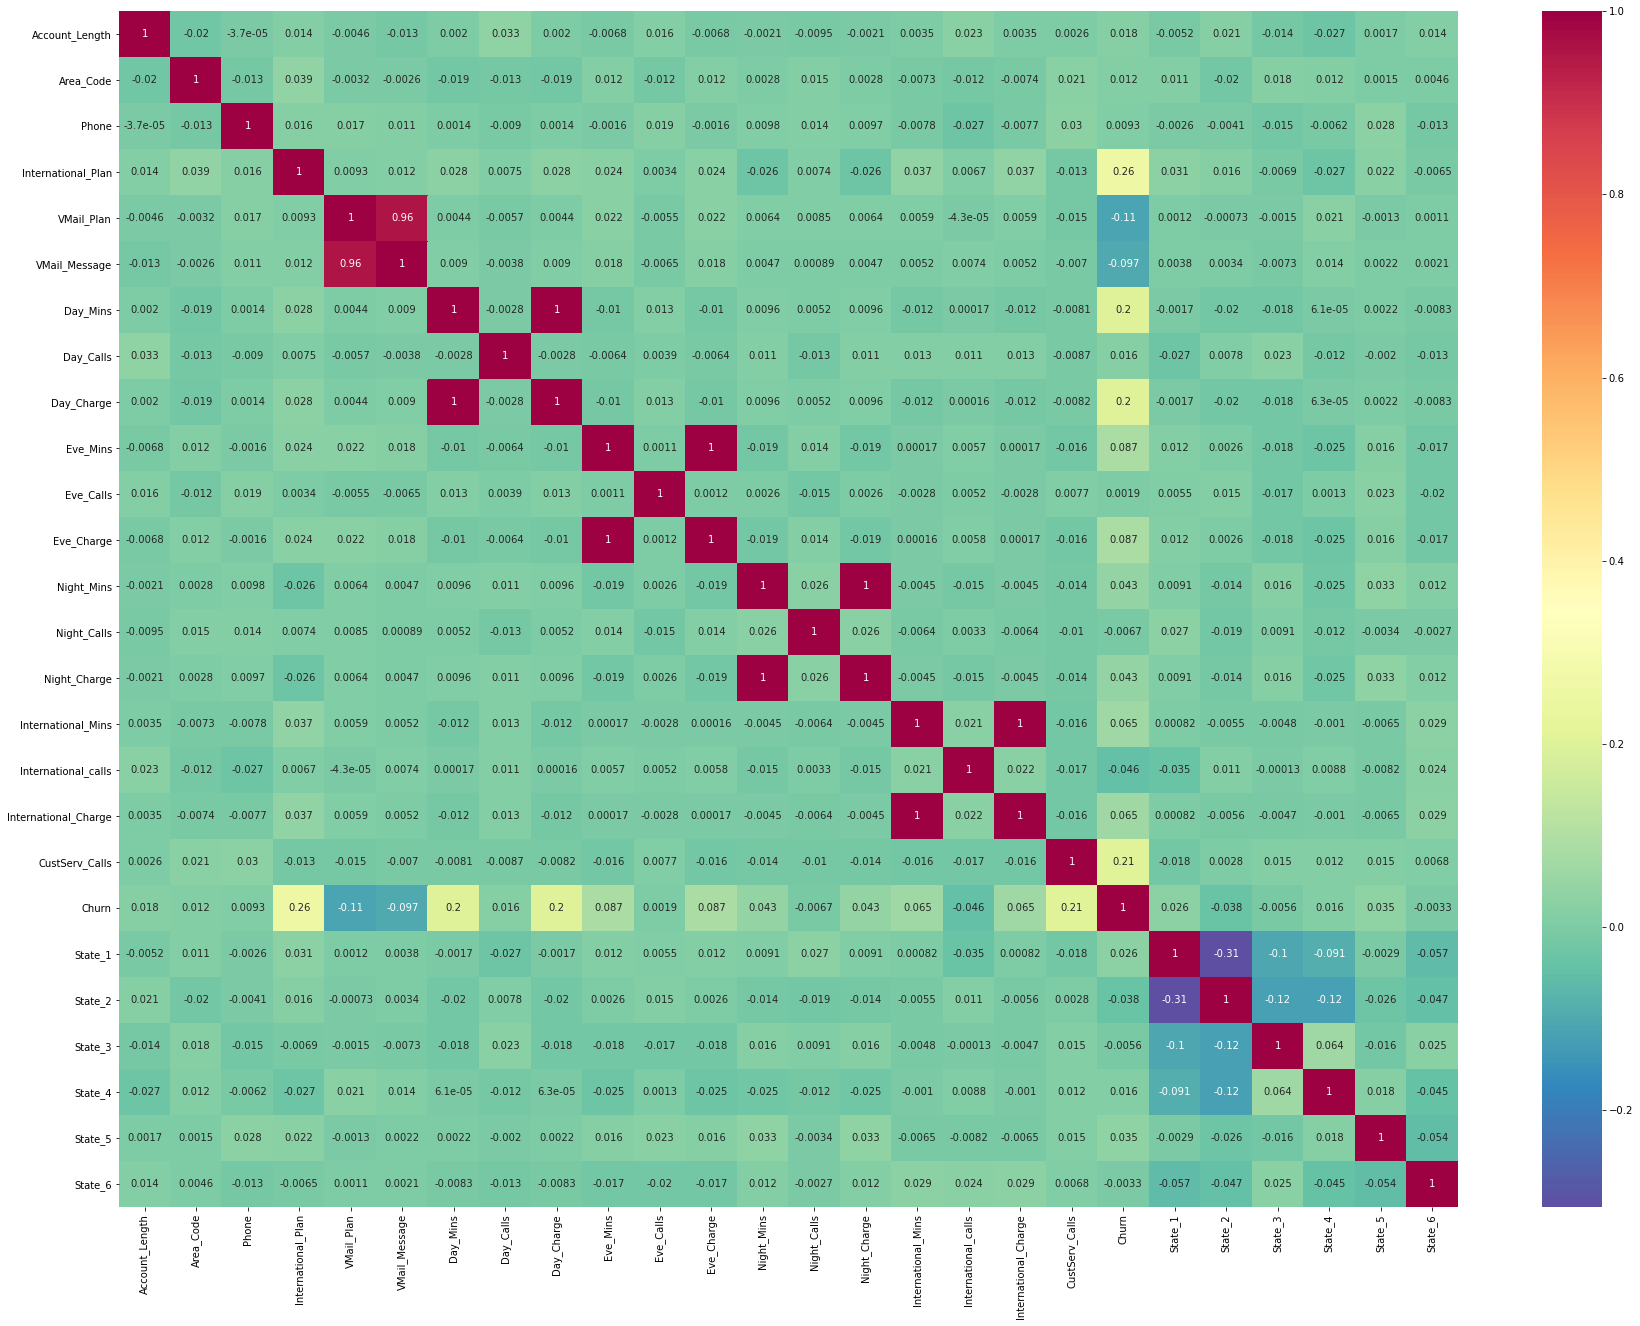

In [29]:
plt.rcParams["figure.figsize"] = 30,22
plt.rcParams["figure.facecolor"] = "white"
corrilation_Ind_features = data.corr()
sb.heatmap(corrilation_Ind_features,annot=True,cmap= "Spectral_r")
plt.show()

from the above figure it is clear that some of the features are duplicates of others hence we need to drop those features

In [30]:
drop_col_names = set()

for i in range(len(corrilation_Ind_features.columns)):
    for j in range(i):
        if abs(corrilation_Ind_features.iloc[i,j] > 0.8):
            col_name = corrilation_Ind_features.columns[i]
            drop_col_names.add(col_name)
        
    

In [31]:
drop_col_names

{'Day_Charge',
 'Eve_Charge',
 'International_Charge',
 'Night_Charge',
 'VMail_Message'}

The above listed features are duplicates of other features hence we can drop these features

In [32]:
data.drop(columns=drop_col_names,inplace=True)

In [33]:
data.head()

,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,...,International_Mins,International_calls,CustServ_Calls,Churn,State_1,State_2,State_3,State_4,State_5,State_6
0,128,415,382,0,1,265.1,110,197.4,99,244.7,...,10.0,3,1,0,0,0,0,0,0,1
1,107,415,371,0,1,161.6,123,195.5,103,254.4,...,13.7,3,1,0,0,0,0,0,1,0
2,137,415,358,0,0,243.4,114,121.2,110,162.6,...,12.2,5,0,0,0,0,0,0,1,1
3,84,408,375,1,0,299.4,71,61.9,88,196.9,...,6.6,7,2,0,0,0,0,0,1,0
4,75,415,330,1,0,166.7,113,148.3,122,186.9,...,10.1,3,3,0,0,0,0,1,0,0


### **  4.Finding correlation to drop features who have low corrilation with Target (Dependent features)

here we are considering 0.08 as our cutoff and if any features below the cutoff then we can say that they are having a low corrilation with the Target feature. so we can remove those duplicates from our data 

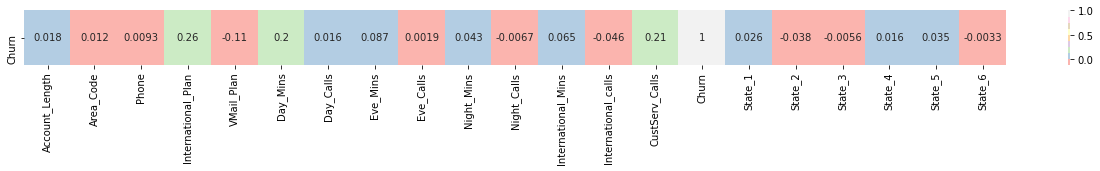

In [34]:

plt.rcParams["figure.figsize"] = 22,1
corrilation_depend = data.corr()
sb.heatmap(corrilation_depend.loc[["Churn"],:],annot=True,cmap= "Pastel1")
plt.show()

From the above heatmap its clear that most of the features are having a very low corrilation with target feature hence we can drop some features

In [35]:
#taking cut off as 0.05
drop_col_names = []
for x,i in enumerate(corrilation_depend["Churn"]):
    if abs(i) < 0.04:
        print(i,"   ",corrilation_depend.columns[x])
        drop_col_names.append(corrilation_depend.columns[x])

0.01804596333797335     Account_Length
0.011995300224197222     Area_Code
0.0092794456539168     Phone
0.016267797010604376     Day_Calls
0.001942881261836244     Eve_Calls
-0.006670885105318874     Night_Calls
0.026382184521520215     State_1
-0.03788076216234512     State_2
-0.005571285140181693     State_3
0.015547709419908151     State_4
0.034931930534799864     State_5
-0.0032547848186444714     State_6


The above mensioned columns are to be dropped from the data set because they are below the cuttoff as well as they less corilated with Target feature

In [36]:
data.drop(columns=drop_col_names,inplace=True)

In [37]:
data.head()

,International_Plan,VMail_Plan,Day_Mins,Eve_Mins,Night_Mins,International_Mins,International_calls,CustServ_Calls,Churn
0,0,1,265.1,197.4,244.7,10.0,3,1,0
1,0,1,161.6,195.5,254.4,13.7,3,1,0
2,0,0,243.4,121.2,162.6,12.2,5,0,0
3,1,0,299.4,61.9,196.9,6.6,7,2,0
4,1,0,166.7,148.3,186.9,10.1,3,3,0


# 5.Normalization of Data

To find weather the given data points lies under the gausiion distribution . If not we need to make them guassion distribution curve

### Normality check of the features 

In [38]:
plt.rcParams["figure.figsize"] = 10,5


def plotfigure(data,feature):
    print("\n\nskewness of the ",feature," is : ",stats.skew(data[feature]))
    print("kurtosis of the ",feature," is : ",stats.kurtosis(data[feature]))
    plt.subplot(1,2,1)
    sb.distplot(data[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
    
def line():
    print("\033[1m" + "_________________________________________________________________________________________________________"+ "\033[0m")



                             I̲n̲t̲e̲r̲n̲a̲t̲i̲o̲n̲a̲l̲_̲P̲l̲a̲n:


skewness of the  International_Plan  is :  2.731107235403605
kurtosis of the  International_Plan  is :  5.458946731273915


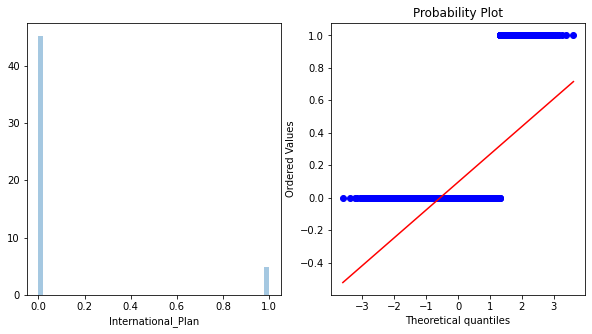

_________________________________________________________________________________________________________

                             V̲M̲a̲i̲l̲_̲P̲l̲a̲n:


skewness of the  VMail_Plan  is :  1.0492898594224374
kurtosis of the  VMail_Plan  is :  -0.8989907909132424


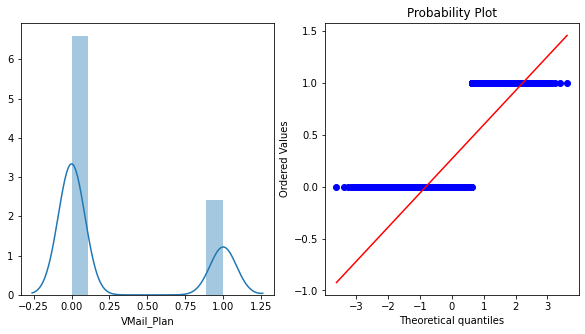

_________________________________________________________________________________________________________

                             D̲a̲y̲_̲M̲i̲n̲s:


skewness of the  Day_Mins  is :  -0.002947284016695239
kurtosis of the  Day_Mins  is :  -0.04365222612737929


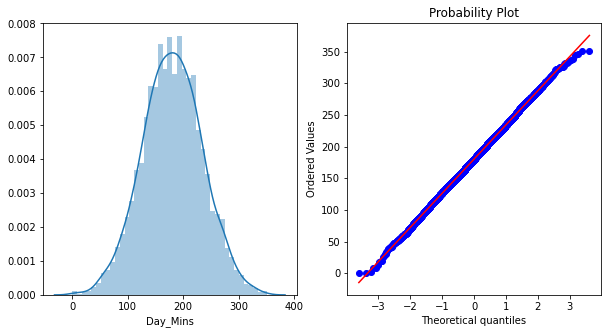

_________________________________________________________________________________________________________

                             E̲v̲e̲_̲M̲i̲n̲s:


skewness of the  Eve_Mins  is :  -0.0052781500846280525
kurtosis of the  Eve_Mins  is :  0.042283656150823745


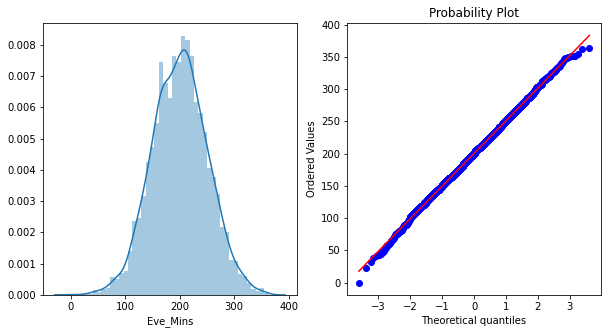

_________________________________________________________________________________________________________

                             N̲i̲g̲h̲t̲_̲M̲i̲n̲s:


skewness of the  Night_Mins  is :  0.02050841390755843
kurtosis of the  Night_Mins  is :  0.06004343141054003


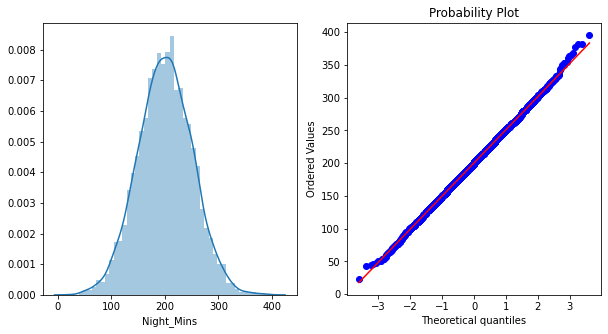

_________________________________________________________________________________________________________

                             I̲n̲t̲e̲r̲n̲a̲t̲i̲o̲n̲a̲l̲_̲M̲i̲n̲s:


skewness of the  International_Mins  is :  -0.22081880952903746
kurtosis of the  International_Mins  is :  0.6695756138404381


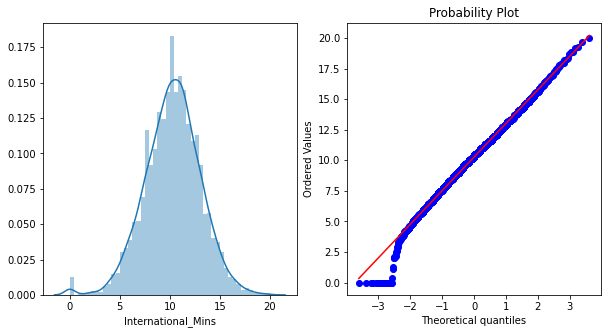

_________________________________________________________________________________________________________

                             I̲n̲t̲e̲r̲n̲a̲t̲i̲o̲n̲a̲l̲_̲c̲a̲l̲l̲s:


skewness of the  International_calls  is :  1.3659756765088018
kurtosis of the  International_calls  is :  3.2980521818291813


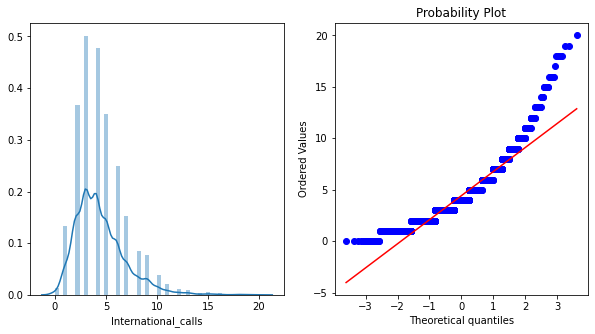

_________________________________________________________________________________________________________

                             C̲u̲s̲t̲S̲e̲r̲v̲_̲C̲a̲l̲l̲s:


skewness of the  CustServ_Calls  is :  1.0464601992374216
kurtosis of the  CustServ_Calls  is :  1.512086924300303


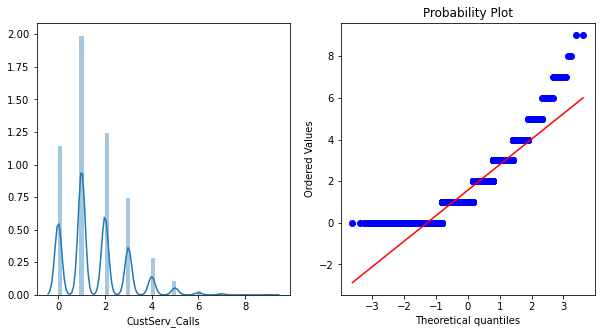

_________________________________________________________________________________________________________

                             C̲h̲u̲r̲n:


skewness of the  Churn  is :  2.050298636747617
kurtosis of the  Churn  is :  2.2037244998491383


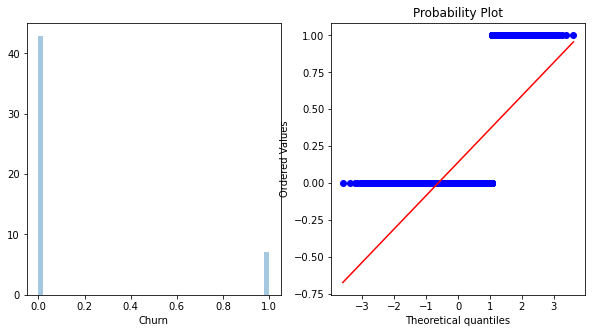

_________________________________________________________________________________________________________


In [39]:
for i in data.columns:
    print("\n                            ","\033[1m" + "\u0332".join(i)+ ":" + "\033[0m")
    plotfigure(data,i)
    line()

By using distplot and QQ plot we get the clear idea about the normality of this data set. In this data set all continues features comes under gaussion distribution hence the data is normal

# 6.Handling Outliers of Continues Features

Outliers are the datapoints which lies after three standard deviation while considering leaniar models we need to consider this outliers otherwise we doesn't get the best fit line 

### * 1.cheching wheather outliers are present or Not

Considering the continues features, Using boxplot we find weather outliers present or not. 

#### -> Considering Day_Mins :

In [40]:
#setting the parameters for plotting
plt.rcParams["figure.figsize"] = 9,4
plt.rcParams["figure.facecolor"] = "pink"

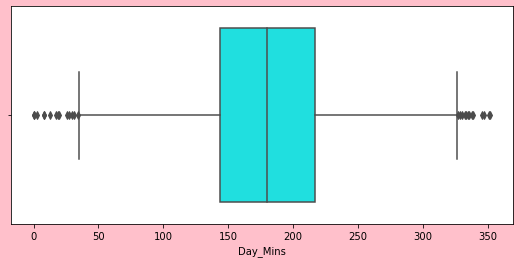

In [41]:
#plotting the boxplot
sb.boxplot(data.Day_Mins,color="cyan")
plt.show()

-> From the above boxplot its clear that " Day_Mins " feature contains outliers so we need to remove those outliers

#### -> Considering Eve_Mins :

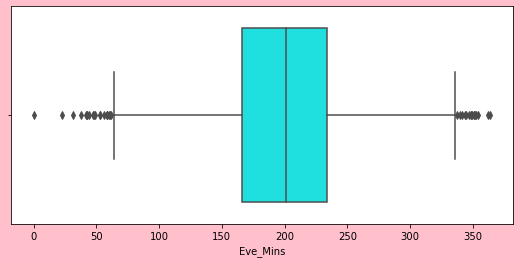

In [42]:
#plotting the boxplot
sb.boxplot(data.Eve_Mins,color="cyan")
plt.show()

-> From the above boxplot its clear that " Eve_Mins " feature contains outliers so we need to remove those outliers

#### -> Considering Night_Mins :

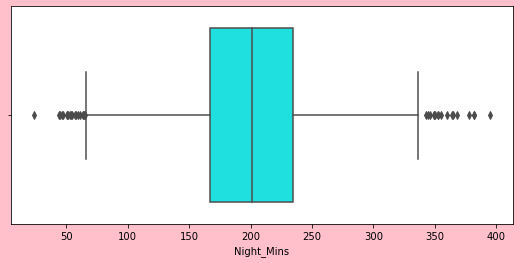

In [43]:
#plotting the boxplot
sb.boxplot(data.Night_Mins,color="cyan")
plt.show()

-> From the above boxplot its clear that " Night_Mins " feature contains outliers so we need to remove those outliers

#### -> Considering International_Mins :

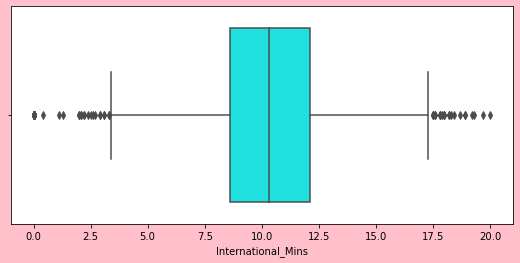

In [44]:
#plotting the boxplot
sb.boxplot(data.International_Mins,color="cyan")
plt.show()

-> From the above boxplot its clear that " International_Mins " feature contains outliers so we need to remove those outliers

### *2. Removing outliers from the continues features

Here we are removing the outliers by changing the value with Boundary values.generally we drop the outliers but in our data the number of data points is very small hence we doesn't drop the outliers. Here we are taking 3 standard deviation from mean as boundary

#### -> Considering Day_Mins :

In [45]:
#Finding mean and standard deviation of Day_mins
Day_Mins_mean = data.Day_Mins.mean()
Day_Mins_std  = data.Day_Mins.std()
print("Mean of Day_Mins               : ",Day_Mins_mean)
print("standard deviation of Day_Mins : ",Day_Mins_std)

Mean of Day_Mins               :  180.44715183019264
standard deviation of Day_Mins :  53.98353976986507


In [46]:
#finding Lower boundary and Heigher Boundary
lower_boundary   = Day_Mins_mean - (3 * Day_Mins_std)
heigher_boundary = Day_Mins_mean + (3 * Day_Mins_std)
print("Lower Boundary of Day_Mins   : ",lower_boundary)
print("Heigher Boundary of Day_Mins : ",heigher_boundary) 

Lower Boundary of Day_Mins   :  18.49653252059744
Heigher Boundary of Day_Mins :  342.39777113978784


Changing the outliers with heigher boundary as well as lower boundary values

In [47]:
data.loc[data.Day_Mins < lower_boundary , "Day_Mins"] = lower_boundary
data.loc[data.Day_Mins > heigher_boundary , "Day_Mins"] = heigher_boundary

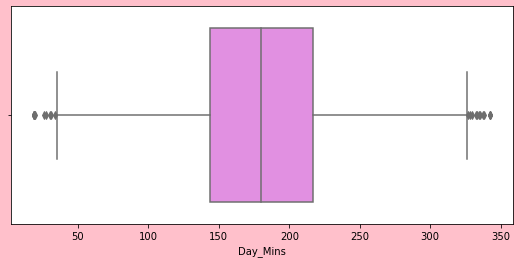

In [48]:
#plotting the boxplot
sb.boxplot(data.Day_Mins,color = "violet" )
plt.show()

We can see that from the boxplot by doing the three sigma limits the outliers are not fully considered so we can use another method ie., by taking Inter Quantile Range(IQR)

In [49]:
#finding Inter Quantile Range(IQR)
IQR = data.Day_Mins.quantile(.75) - data.Day_Mins.quantile(0.25)
print("IQR value of Day_Mins : ",IQR)

IQR value of Day_Mins :  73.10000000000002


In [50]:
#finding under bridge and over bridge values
under_bridge= data.Day_Mins.quantile(.25) - (IQR * 1.5)
over_bridge = data.Day_Mins.quantile(.75) + (IQR * 1.5)
print("Under_bridge value of Day_Mins : ",under_bridge)
print("over_bridge value Day_Mins     : ",over_bridge)

Under_bridge value of Day_Mins :  34.049999999999955
over_bridge value Day_Mins     :  326.45000000000005


In [51]:
#replacing the outliers with the bridge values
data.loc[data.Day_Mins < under_bridge , "Day_Mins"] = under_bridge
data.loc[data.Day_Mins > over_bridge , "Day_Mins"] = over_bridge

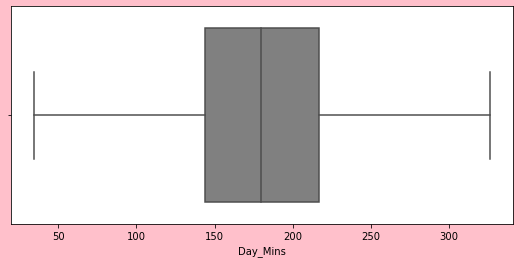

In [52]:
#plotting the boxplot
sb.boxplot(data.Day_Mins,color = "grey")
plt.show()

From the above boxplot figure it is clear that we have handled all the outliers from the data.hence we continue with this method for all other features

#### -> Considering Eve_Mins :

In [53]:
#Finding Inter Quantile Range
IQR = data.Eve_Mins.quantile(.75) - data.Eve_Mins.quantile(0.25)
print("IQR value of Eve_Mins : ",IQR)

IQR value of Eve_Mins :  68.1


In [54]:
#finding under bridge and over bridge values
under_bridge= data.Eve_Mins.quantile(.25) - (IQR * 1.5)
over_bridge = data.Eve_Mins.quantile(.75) + (IQR * 1.5)
print("Under_bridge value of Eve_Mins : ",under_bridge)
print("over_bridge value Eve_Mins     : ",over_bridge)

Under_bridge value of Eve_Mins :  63.750000000000014
over_bridge value Eve_Mins     :  336.15


In [55]:
#replacing the outliers with the bridge values
data.loc[data.Eve_Mins < under_bridge , "Eve_Mins"] = under_bridge
data.loc[data.Eve_Mins > over_bridge , "Eve_Mins"] = over_bridge

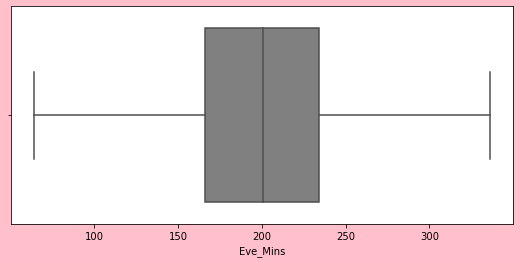

In [56]:
#plotting the boxplot
sb.boxplot(data.Eve_Mins,color="grey")
plt.show()

From the above boxplot figure it is clear that we have handled all the outliers from the data.

#### -> Considering Night_Mins :

In [57]:
#Finding Inter Quantile Range
IQR = data.Night_Mins.quantile(.75) - data.Night_Mins.quantile(0.25)
print("IQR value of Eve_Mins : ",IQR)

IQR value of Eve_Mins :  67.80000000000001


In [58]:
#finding under bridge and over bridge values
under_bridge= data.Night_Mins.quantile(.25) - (IQR * 1.5)
over_bridge = data.Night_Mins.quantile(.75) + (IQR * 1.5)
print("Under_bridge value of Eve_Mins : ",under_bridge)
print("over_bridge value Eve_Mins     : ",over_bridge)

Under_bridge value of Eve_Mins :  65.39999999999998
over_bridge value Eve_Mins     :  336.6


In [59]:
#replacing the outliers with the bridge values
data.loc[data.Night_Mins < under_bridge , "Night_Mins"] = under_bridge
data.loc[data.Night_Mins > over_bridge , "Night_Mins"] = over_bridge

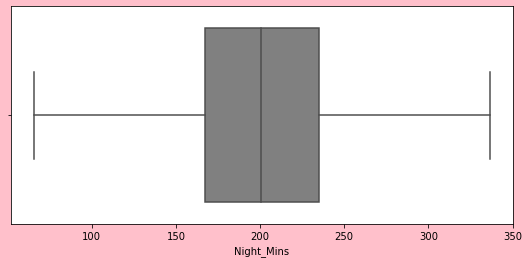

In [60]:
#plotting the boxplot
sb.boxplot(data.Night_Mins,color="grey")
plt.show()

From the above boxplot figure it is clear that we have handled all the outliers from the data.

#### -> Considering International_Mins :

In [61]:
#Finding Inter Quantile Range
IQR = data.International_Mins.quantile(.75) - data.International_Mins.quantile(0.25)
print("IQR value of Eve_Mins : ",IQR)

IQR value of Eve_Mins :  3.5


In [62]:
#finding under bridge and over bridge values
under_bridge= data.International_Mins.quantile(.25) - (IQR * 1.5)
over_bridge = data.International_Mins.quantile(.75) + (IQR * 1.5)
print("Under_bridge value of Eve_Mins : ",under_bridge)
print("over_bridge value Eve_Mins     : ",over_bridge)

Under_bridge value of Eve_Mins :  3.3499999999999996
over_bridge value Eve_Mins     :  17.35


In [63]:
#replacing the outliers with the bridge values
data.loc[data.International_Mins < under_bridge , "International_Mins"] = under_bridge
data.loc[data.International_Mins > over_bridge , "International_Mins"] = over_bridge

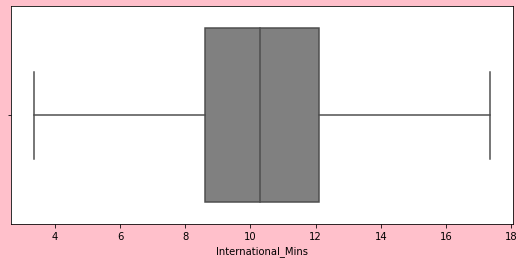

In [64]:
#plotting the boxplot
sb.boxplot(data.International_Mins,color="grey")
plt.show()

From the above boxplot figure it is clear that we have handled all the outliers from the data.

# 7.Defining X and y

In [65]:
#classifing X and y
X = data.iloc[:,:-1]
y = data.Churn

# 8.Scailing using standard scalar

In [66]:
scale = StandardScaler()
X = scale.fit_transform(X)

# 9.Splitting the Data(Train_test_split) 

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

# 10.Over_sampling using SMOTE

In [68]:
#upsampling using smote
enc = SMOTE(k_neighbors=2)
X_train,y_train = enc.fit_sample(X_train.astype(float),y_train.astype(float))
y_train.value_counts()

1.0    2776
0.0    2776
Name: Churn, dtype: int64

# 11.Modelling

***modelling using Logistic_model***

In [69]:
model = LogisticRegression(random_state=24)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7633477633477633

we are getting around 85% accuracy. ie., our model efficiency is less

In [70]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,911,274
1,54,147


we did scaling for logistic regression, however after doing it we see that the data points are coming closer and is creating conflict while finding the best fit line. This results in an Overfitting problem and the recall rate is too small. Hence, we decided to go with other ML models rather than logistic model.

***modelling using KNN***

In [105]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8362193362193362

Accuracy is increasing by using KNN but we need to get accuracy grater than 90% as well as KNN works on finding neibours here scailing is required. so we can consider another model for better accuracy

In [106]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,990,195
1,32,169


above cross tab says that the model works better in finding "0" but in case of "1" it fails

***modelling using SVM***

In [73]:
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9213564213564214

SVM gives good accuracy than KNN but svm also works in distance method so the model mayget better perfomance after scailing.

In [74]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,1117,68
1,41,160


SVM works better than other models in case of "0" ie., error is too small but while considering "1" its a failed model and our main requirements is to find "1" not "0" hence we drop this model and moving to another model

***modelling using XGBOOST***

In [75]:
model = XGBClassifier(random_state=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9559884559884559

XGBOOST is working very good in this data set and giving about 95% accuracy

In [76]:
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,1164,21
1,40,161


In [107]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1185
           1       0.46      0.84      0.60       201

    accuracy                           0.84      1386
   macro avg       0.72      0.84      0.75      1386
weighted avg       0.90      0.84      0.85      1386



XGB is working good and most of the points are predicted correctly so we can go with XGB

***modelling using RandomForest***

In [113]:
#modelling 
model = RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9574314574314574

Random_Forest is working very good in this data set and giving about 95% accuracy

In [114]:
#printing crosstab
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,1168,17
1,42,159


Random_Forest is working good and most of the points are predicted correctly so we can go with XGB

While comparing all the models Random forest gives good accuracy as well it is a stable model as compired to others hence we decided to go with Random forest 

In [115]:
#printing classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1185
           1       0.90      0.79      0.84       201

    accuracy                           0.96      1386
   macro avg       0.93      0.89      0.91      1386
weighted avg       0.96      0.96      0.96      1386



from the above report its clear that precision score and recall score both are grater than 88% so the model is working good 

#### ->Cross_Validation_Score(CV_Score)

In [116]:
CV_score = cross_val_score(RandomForestClassifier(),X,y,cv=8)
CV_score

array([0.95155709, 0.94454073, 0.95667244, 0.96013865, 0.95147314,
       0.96187175, 0.94627383, 0.96013865])

In [117]:
print("Maximum CV_score obtained : ", max(CV_score))
print("Minimum CV_score obtained : ", min(CV_score))
print("Average CV_score obtained : ", CV_score.mean())

Maximum CV_score obtained :  0.9618717504332756
Minimum CV_score obtained :  0.9445407279029463
Average CV_score obtained :  0.9540832848584433


By refering the above cell we can say that our model is not overfitted so we can continue with this model

#### -> Hyper_Parameter_Tuning using Grid_Search_CV

In [83]:
#parameter grid to pass values to grid search cv
parameters = { 
                "n_estimators" : [100,120,150],
                "random_state" : [10,24,40,100],
                "max_depth"    : [5,10,15],
                "min_samples_split" : [5,10,15],
                "min_samples_leaf"  : [3,4,5],
             }

In [84]:
#grid_score = GridSearchCV(RandomForestClassifier(),param_grid=parameters,verbose=2,scoring="accuracy")
#grid_score.fit(X_train,y_train)

In [85]:
#grid_score.best_score_

In [86]:
#grid_score.best_params_


### Randamized_Search CV

In [87]:
rs_score = RandomizedSearchCV(RandomForestClassifier(),parameters,verbose=2,scoring="accuracy")
rs_score.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   1.0s
[CV] random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   1.0s
[CV] random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15 
[CV]  random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   0.9s
[CV] random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15 
[CV]  random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   1.1s
[CV] random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15 
[CV]  random_state=40, n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=15, total=   1.0s
[CV] random_state=100, n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_depth=10 
[CV]  random_state=100, n_estimators=150, min_samples_split=10, min_samples_leaf=5, max_depth=10, total=   1.3s
[CV] random_state=100, n_estimators=150, min_samples_split=

[CV]  random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15, total=   0.9s
[CV] random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15 
[CV]  random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15, total=   1.0s
[CV] random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15 
[CV]  random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15, total=   0.9s
[CV] random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15 
[CV]  random_state=10, n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_depth=15, total=   1.0s
[CV] random_state=24, n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=15 
[CV]  random_state=24, n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=15, total=   1.2s
[CV] random_state=24, n_estimators=100, min_samples_split=5, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.5s finished


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 120, 150],
                                        'random_state': [10, 24, 40, 100]},
                   scoring='accuracy', verbose=2)

In [88]:
rs_score.best_score_

0.952994380519133

In [89]:
rs_score.best_params_

{'random_state': 24,
 'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 15}

***Remodelling using Random_Forest with best parameters from GridSearchCV***

In [101]:
# modelling 
model = RandomForestClassifier(max_depth=15,min_samples_leaf=3,min_samples_split=5,n_estimators=100,random_state=24)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9502164502164502

In [104]:
#printing crosstab
pd.crosstab(y_test,y_predict)

col_0,0.0,1.0
Churn,,
0,1155,30
1,39,162


In [103]:
# priting classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1185
           1       0.84      0.81      0.82       201

    accuracy                           0.95      1386
   macro avg       0.91      0.89      0.90      1386
weighted avg       0.95      0.95      0.95      1386



# 12.Saving model as Pickle

To export a file first we need to save the model as a pickle(here we are saving the pickle in binary format)

In [93]:
# 1.fp is file pointer which points towards the file "model.pkl", open function is used to create a file , "wb" means the mode write in binary
# 2.after the use of file pointer we need to close the file pointer otherwise we will get error
# 3.pkl is the alias name of pickle and pkl is used to save the ML models,dump is a function inside the pickle to insert the values into the pointed file 


fp = open("model.pkl","wb")
pkl.dump(model,fp)
fp.close()

## Churn risk score

##### formula for finding churn_rate :-
 
#### Churn Rate =  (users at the begining of period - users at the end of the period)/users at the begining of the period

In [94]:
data.shape

(4617, 9)

In [95]:
data.head()

,International_Plan,VMail_Plan,Day_Mins,Eve_Mins,Night_Mins,International_Mins,International_calls,CustServ_Calls,Churn
0,0,1,265.1,197.40,244.7,10.0,3,1,0
1,0,1,161.6,195.50,254.4,13.7,3,1,0
2,0,0,243.4,121.20,162.6,12.2,5,0,0
3,1,0,299.4,63.75,196.9,6.6,7,2,0
4,1,0,166.7,148.30,186.9,10.1,3,3,0


In [96]:
data.Churn.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

Here 3961 customers are left after the end of the perieod and 656 customers left the company after the end of the perieod

->users at the begining of the period  = 4617


->users at the the end of the period = 3961

#### Churn Rate =  (users at the begining of period - users at the end of the period)/users at the begining of the period

In [97]:
churn_score_1 = (4617-3961)/4617 * 100
churn_score_1

14.208360407190817

hence 14.2 % of customers left the company after end of the perieod